# Tasks for laboratory assignment 1

In [2]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [3]:
def parse_web_page(url):
    response = requests.get(url)
    response.raise_for_status()

    soup = BeautifulSoup(response.text, 'html.parser')
    return soup.get_text(separator=' ', strip=True)

print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])

Головна - Факультет математики та інформатики Перейти до основного вмісту [email protected] 58012, Україна, м. Чернівці, вул. Університетська, 28 Новини Всі Загальні Оголошення Події Студенту Викладачу Вітання Діяльність Наукова Навчально-методична Міжнар
Web scraping - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Search Searc


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [4]:
def parse_api(api_url):    
    response = requests.get(api_url)
    response.raise_for_status()

    data = response.json()
    with open('resources/result.json', 'w') as json_file:
        json.dump(data, json_file, indent=4)

    print("Data has been successfully saved to result.json.")

parse_api('https://api.github.com/')

Data has been successfully saved to result.json.


## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [5]:
def parse_json(date):
    file_path = "resources/weather.json"
    date_format = "%Y-%m-%d"
    
    with open(file_path, 'r') as json_file:
        weather_data = json.load(json_file)

    formatted_date = datetime.strptime(date, date_format).date()
    filtered_data = [
        entry for entry in weather_data['daily'] 
        if datetime.strptime(entry.get('date'), date_format).date() == formatted_date
    ]
    
    return filtered_data
    
target_date = '2024-8-19'
print(parse_json(target_date))

[{'date': '2024-08-19', 'max_temperature': 30.0, 'min_temperature': 21.0, 'precipitation': 5.0, 'wind_speed': 10.0, 'humidity': 70, 'weather_description': 'Light rain'}]


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [6]:
def parse_csv(date):
    file_path = "resources/weather.csv"
    weather_data = []

    with open(file_path, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)  

        for row in csv_reader:
            if row['CET'] == date:
                weather_data.append(row)

    return weather_data
    
target_date = '1997-5-22'
print(parse_csv(target_date))

[{'CET': '1997-5-22', 'Max TemperatureC': '25', 'Mean TemperatureC': '18', 'Min TemperatureC': '10', 'Dew PointC': '11', 'MeanDew PointC': '8', 'Min DewpointC': '6', 'Max Humidity': '88', ' Mean Humidity': '54', ' Min Humidity': '34', ' Max Sea Level PressurehPa': '1017', ' Mean Sea Level PressurehPa': '1015', ' Min Sea Level PressurehPa': '1012', ' Max VisibilityKm': '10', ' Mean VisibilityKm': '10', ' Min VisibilitykM': '10', ' Max Wind SpeedKm/h': '11', ' Mean Wind SpeedKm/h': '3', ' Max Gust SpeedKm/h': '', 'Precipitationmm': '0.00', ' CloudCover': '3', ' Events': '', 'WindDirDegrees': '277'}]


## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

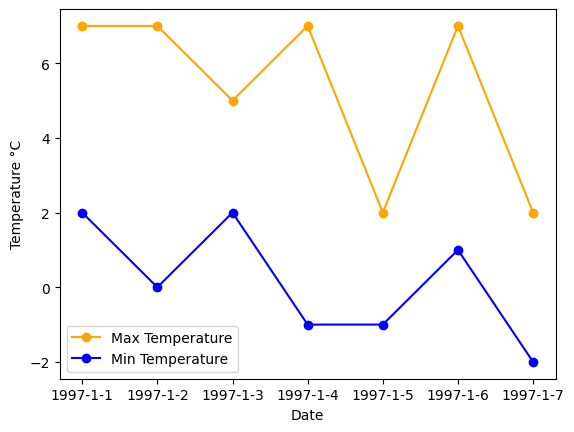

In [7]:
def visualize_data():
    df = pd.read_csv(
        "resources/weather.csv",
        dtype={"CET": str},
        usecols=["CET", "Max TemperatureC", "Min TemperatureC"],
        nrows=7)
    
    plt.plot(
        df["CET"],
        df["Max TemperatureC"],
        marker="o",
        color="orange",
        label = "Max Temperature")
    
    plt.plot(
        df["CET"], 
        df["Min TemperatureC"], 
        marker="o", 
        color="blue", 
        label="Min Temperature")

    plt.xlabel("Date"),
    plt.ylabel("Temperature °C")
    plt.legend()

    plt.savefig("resources/temp.png")

visualize_data()